<b>Background</b>  
This competition is designed to help you get started with DataCamp Competitions and familiarize yourself with how competitions work. You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area. You’ve recently learned data manipulation and plotting, and are helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

<b>Your challenge</b>  
Create a report to answer your colleague's questions. Include:  

- What are the total sales for each payment method?
- What is the average unit price for each product line?
- Create plots to visualize findings for questions 1 and 2.
- [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
- Summarize your findings.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [31]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def format(x):
        return "${:.2f}".format(x)

In [44]:
# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [79]:
# Add in a week column
df['week'] = df['date'].dt.week

df.head()

C:\Users\andre\AppData\Local\Temp/ipykernel_15564/1284370482.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,week
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,22
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,22
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,22
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,22
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,22


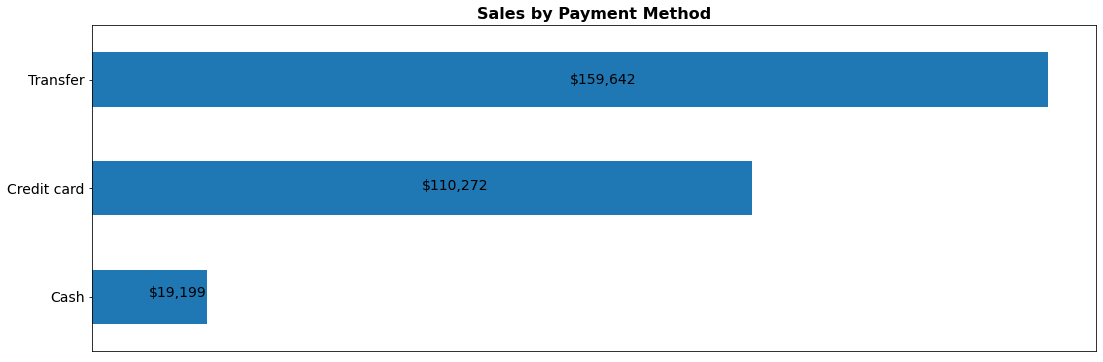

In [70]:
# total sales for each payment method
df.groupby(['payment'])[['total']].sum().sort_values('total').plot(kind = 'barh', figsize = (18,6), fontsize = 14)
plt.title('Sales by Payment Method', fontsize = 16, fontweight = 'bold')
fmt = '${x:,.0f}'
c = 0
for i in df.groupby(['payment'])[['total']].sum().sort_values('total')['total'].values:
    plt.text(i/2, float(c*.98), '${:,.0f}'.format(i), size = 14)
    c += 1
plt.legend().remove()
plt.ylabel('')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.rc('axes', labelsize=14)


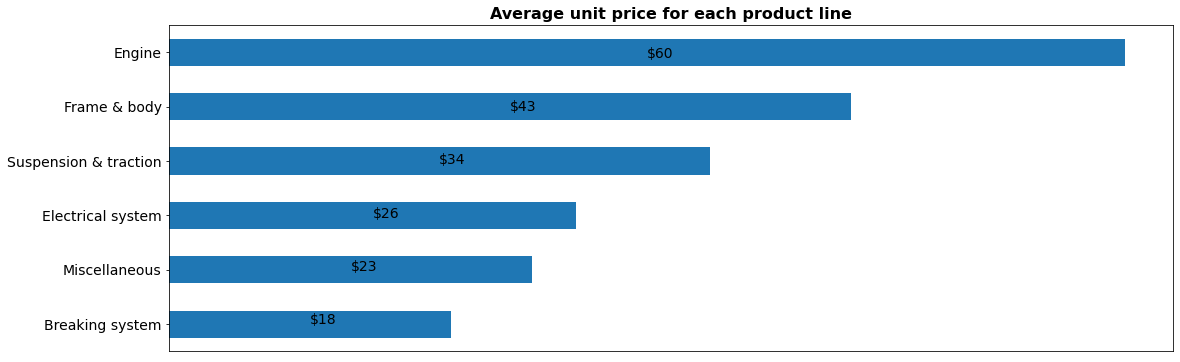

In [6]:
#average unit price for each product line
df.groupby(['product_line'])[['unit_price']].mean().sort_values('unit_price').plot(kind = 'barh', figsize = (18,6), fontsize = 14)
plt.title('Average unit price for each product line', fontsize = 16, fontweight = 'bold')
fmt = '${x:,.0f}'
c = 0
for i in df.groupby(['product_line'])[['unit_price']].mean().sort_values('unit_price')['unit_price'].values:
    plt.text(i/2, float(c*.98), '${:,.0f}'.format(i), size = 14)
    c += 1
plt.legend().remove()
plt.ylabel('')
ax = plt.gca()
ax.get_xaxis().set_visible(False)

In [14]:
df.pivot_table(
    index =['product_line'],
    columns=['warehouse'],
    values =['unit_price'],
    aggfunc ='mean'
)

unit_price                      
warehouse                Central      North       West
product_line                                          
Breaking system        17.499107  17.462394  18.735957
Electrical system      25.723297  25.525758  25.344722
Engine                 60.058889  59.125625  61.941111
Frame & body           42.737949  42.602373  43.553448
Miscellaneous          22.725690  22.938684  22.813462
Suspension & traction  33.649619  34.039556  34.798788

Text(152.5, 0.5, 'Product Line')

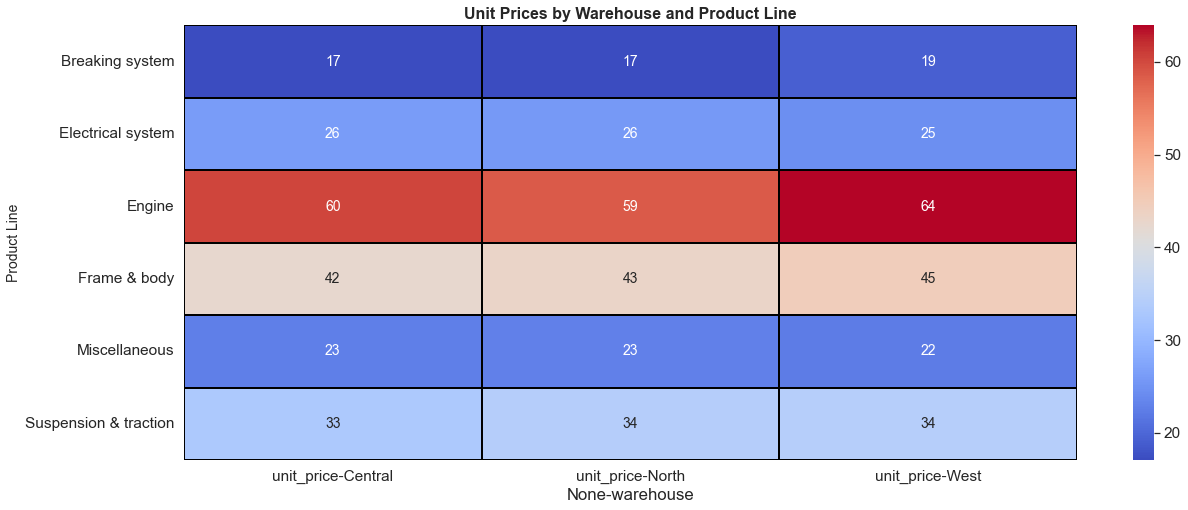

In [93]:
plt.figure(figsize = (20,8))
sns.set(
    font_scale=1.4, 
    rc={"lines.linewidth": 3}
)

sns.heatmap(
    df.pivot_table(
        index =['product_line'],
        columns=['warehouse'],
        values =['unit_price'],
        aggfunc ='median'
    ),
    annot=True,
    annot_kws={"size": 14},
    cmap = 'coolwarm',
    linewidths=0.2, 
    linecolor='black'
    ) 

plt.title('Unit Prices by Warehouse and Product Line', fontsize = 16, fontweight = 'bold')
plt.rc('axes', labelsize=14)
plt.ylabel('Product Line', fontsize = 14)

Text(152.5, 0.5, 'Product Line')

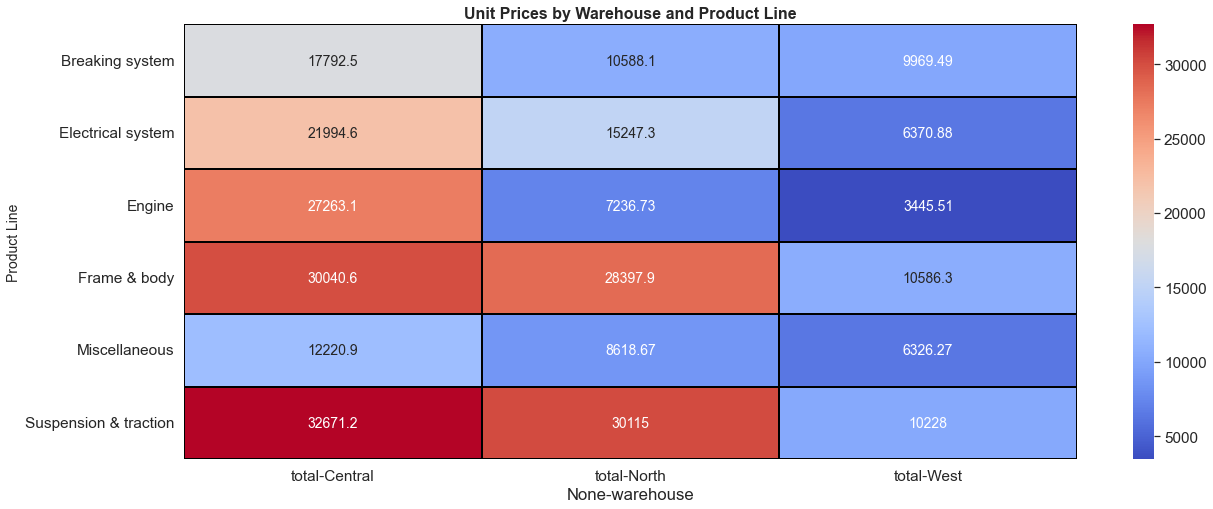

In [101]:
plt.figure(figsize = (20,8))
sns.set(
    font_scale=1.4, 
    rc={"lines.linewidth": 3}
)

sns.heatmap(
    df.pivot_table(
        index =['product_line'],
        columns=['warehouse'],
        values =['total'],
        aggfunc ='sum'        
    ),
    fmt = 'g',
    annot=True,
    annot_kws={"size": 14},
    cmap = 'coolwarm',
    linewidths=0.2, 
    linecolor='black'
    ) 

plt.title(
    'Unit Prices by Warehouse and Product Line', 
    fontsize = 16, 
    fontweight = 'bold'
)
plt.ylabel(
    'Product Line', 
    fontsize = 14
)

<AxesSubplot:xlabel='unit_price', ylabel='payment'>

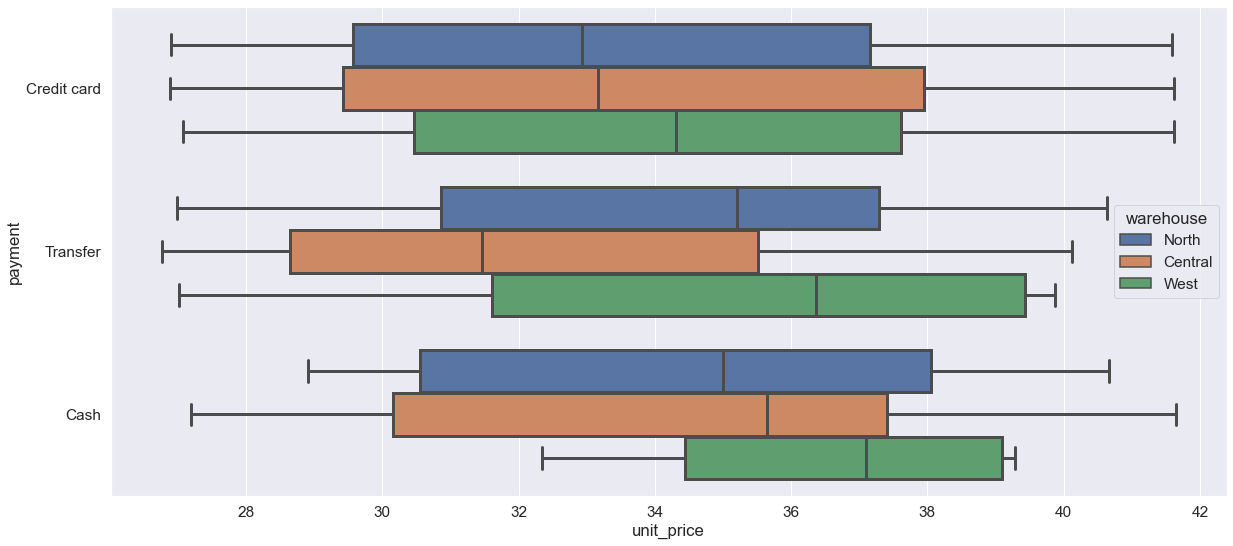

In [102]:
temp = df.loc[df['product_line'] == 'Suspension & traction', :]

plt.figure(figsize = (20,9))
sns.boxplot(
    data = temp, 
    x = 'unit_price',
    y = 'payment',
    hue = 'warehouse'
)

In [131]:
temp = df.groupby(['week', 'warehouse'])[['total']].sum().sort_values('week')


array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], dtype=int64)

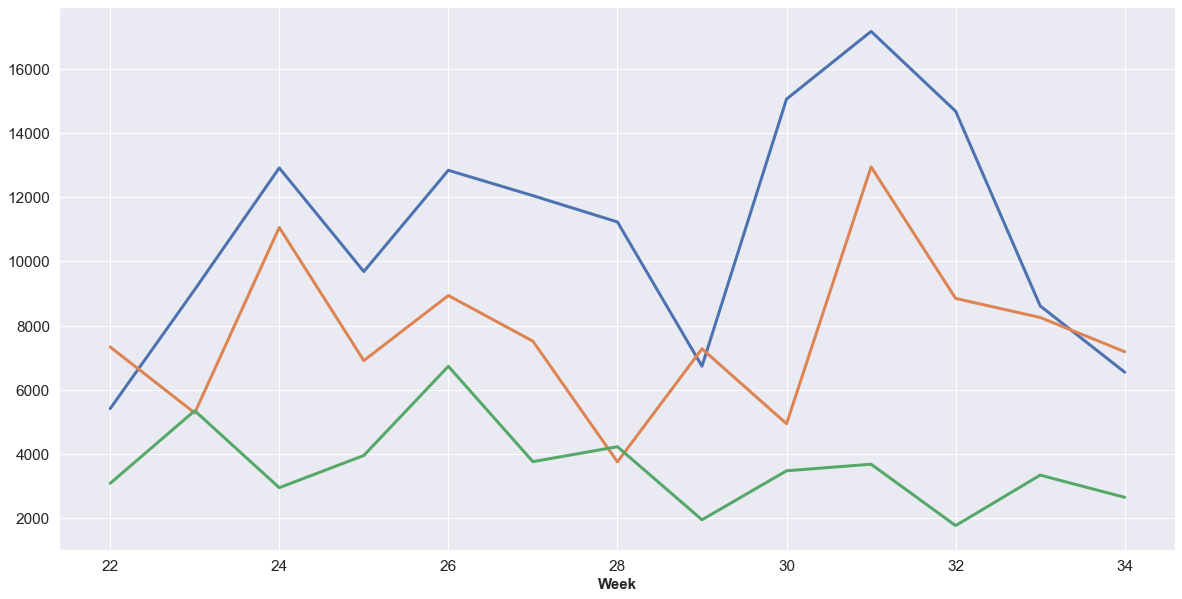

In [135]:


plt.figure(figsize = (20,10))
for i in df['warehouse'].unique():
    plt.plot(
        temp.index.get_level_values('week')[temp.index.get_level_values('warehouse') == i].values,
        temp.loc[temp.index.get_level_values('warehouse') == i, 'total'].values
    )
plt.xlabel(
    'Week',
    fontsize = 15, 
    fontweight = 'bold'
)
plt.show()

In [78]:
df['date'].dt.week

C:\Users\andre\AppData\Local\Temp/ipykernel_15564/2158599560.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['date'].dt.week


0      22
1      22
2      22
3      22
4      22
       ..
995    34
996    34
997    34
998    34
999    34
Name: date, Length: 1000, dtype: int64